In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_excel(r"D:\computer\Level7\new\Machine\Lab\Project\Data_Train.xlsx")
df_original = df.copy()

In [4]:
df.duplicated().sum()

220

In [5]:
df = df.drop_duplicates()


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [9]:
# can get from Date_of_Journey and Duration

# can use Total_Stops instead
df.drop(columns=['Route'], inplace=True)

#df.drop(columns=['Additional_Info'], inplace=True)


In [10]:
df.duplicated().sum()

0

In [11]:
df = df.drop_duplicates()


In [12]:
df.duplicated().sum()

0

In [13]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648


In [14]:
def parse_arrival_time(row):
    try:
        return pd.to_datetime(row['Arrival_Time'], format='%H:%M %d %b')
    except ValueError:
        return pd.to_datetime(row['Arrival_Time'], format='%H:%M')

In [1483]:
#df['Arrival_Time'] = df.apply(parse_arrival_time, axis=1)

In [15]:
# df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
# df['Arrival_Minute'] = df['Arrival_Time'].dt.minute
df.drop(columns=['Arrival_Time'], inplace=True)  # Drop the original column



In [16]:
def convert_duration(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('h')[-1].replace('m', '').strip()) if 'm' in duration.split('h')[-1] else 0
    return hours * 60 + minutes

df['Duration'] = df['Duration'].apply(convert_duration)


In [17]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,285,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,150,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,155,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,180,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,160,non-stop,No info,12648


In [18]:
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [19]:
stop_mapping = {
    "non-stop": 0,
    "1 stop": 1,
    "2 stops": 2,
    "3 stops": 3,
    "4 stops": 4
}
df['Total_Stops'] = df['Total_Stops'].map(stop_mapping)


In [1489]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,170,0.0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,445,2.0,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,1140,2.0,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,325,1.0,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,285,1.0,No info,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,150,0.0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,155,0.0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,180,0.0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,160,0.0,No info,12648


In [20]:
# Extract hour and minute from 'Dep_Time'
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(columns=['Dep_Time'], inplace=True)  # Drop the original column




C:\Users\minam\AppData\Local\Temp\ipykernel_17316\2024749476.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
C:\Users\minam\AppData\Local\Temp\ipykernel_17316\2024749476.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute


In [1491]:
df

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,170,0.0,No info,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,445,2.0,No info,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,1140,2.0,No info,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,325,1.0,No info,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,285,1.0,No info,13302,16,50
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,150,0.0,No info,4107,19,55
10679,Air India,27/04/2019,Kolkata,Banglore,155,0.0,No info,4145,20,45
10680,Jet Airways,27/04/2019,Banglore,Delhi,180,0.0,No info,7229,8,20
10681,Vistara,01/03/2019,Banglore,New Delhi,160,0.0,No info,12648,11,30


In [21]:
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month
df['Journey_Year'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.year

df.drop(columns=['Date_of_Journey'], inplace=True) 


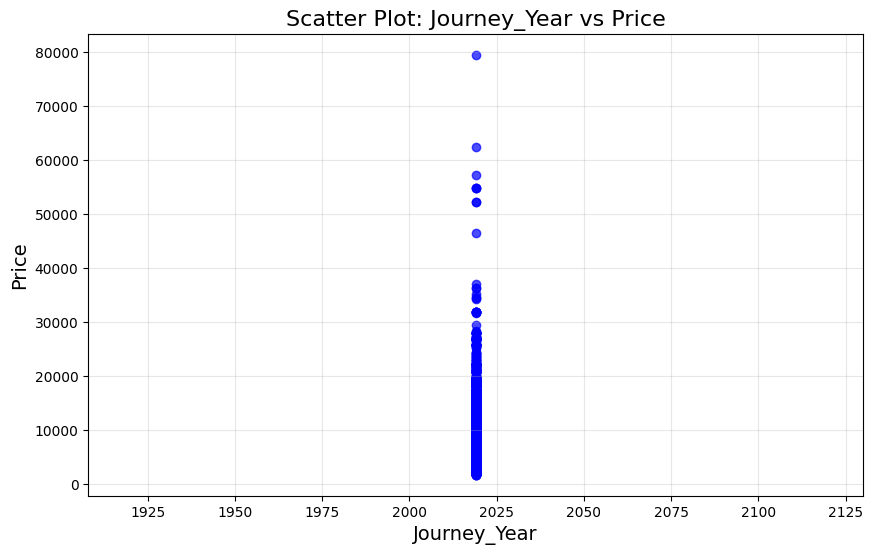

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Journey_Year'], df['Price'], alpha=0.7, color='blue')
plt.title("Scatter Plot: Journey_Year vs Price", fontsize=16)
plt.xlabel("Journey_Year", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

In [23]:
df["Journey_Year"].value_counts()

Journey_Year
2019    10463
Name: count, dtype: int64

In [24]:
df.drop(columns=['Journey_Year'], inplace=True)


In [25]:
df.duplicated().sum()

2

In [26]:
df = df.drop_duplicates()


In [27]:
df.duplicated().sum()

0

In [28]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 10461 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10461 non-null  object 
 1   Source           10461 non-null  object 
 2   Destination      10461 non-null  object 
 3   Duration         10461 non-null  int64  
 4   Total_Stops      10460 non-null  float64
 5   Additional_Info  10461 non-null  object 
 6   Price            10461 non-null  int64  
 7   Dep_Hour         10461 non-null  int32  
 8   Dep_Minute       10461 non-null  int32  
 9   Journey_Day      10461 non-null  int32  
 10  Journey_Month    10461 non-null  int32  
dtypes: float64(1), int32(4), int64(2), object(4)
memory usage: 817.3+ KB


In [29]:
print(df.isnull().sum())


Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Dep_Hour           0
Dep_Minute         0
Journey_Day        0
Journey_Month      0
dtype: int64


In [30]:
df = df.dropna(subset=['Total_Stops'])

In [31]:
print(df.isnull().sum())


Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Dep_Hour           0
Dep_Minute         0
Journey_Day        0
Journey_Month      0
dtype: int64


In [32]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,19,55,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,20,45,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,8,20,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,11,30,1,3


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder  ,MinMaxScaler,PolynomialFeatures
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LinearRegression, Ridge, Lasso,SGDRegressor ,ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [34]:
x = df.drop("Price" , axis = 1 )
y = df["Price"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=102)

print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*20)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (7845, 10)
y_train.shape 	 (7845,)
************************************************************
X_test.shape 	 (2615, 10)
y_test.shape 	 (2615,)


In [36]:
Num_Columns = x.select_dtypes(include="number")
Cat_Columns = x.select_dtypes(include="object_")

In [37]:
Num_Steps = list()
#Num_Steps.append(("Poly", PolynomialFeatures(degree=4, include_bias=False)))
Num_Steps.append(("Scaler", StandardScaler()))
Num_Pipeline = Pipeline(steps=Num_Steps)

In [38]:
Cat_Steps = list()
Cat_Steps.append(("Cat_Encoder", OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')))
Cat_Pipeline = Pipeline(steps=Cat_Steps)


In [39]:
Transformer = ColumnTransformer(
    transformers=[
        ('Num', Num_Pipeline, Num_Columns.columns), 
        ('Cat', Cat_Pipeline, Cat_Columns.columns)   
    ], 
    remainder='passthrough' 
)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid for SGDRegressor
param_grid = {
    "Model__alpha": [0.0001, 0.001, 0.01, 0.1],
    "Model__eta0": [0.0001, 0.001, 0.01],
    "Model__learning_rate": ['constant', 'adaptive'],
    "Model__max_iter": [1000],
    "Model__tol": [1e-3, 1e-4, 1e-5],
    "Model__penalty": ['elasticnet'],  # Set penalty to elasticnet
    "Model__l1_ratio": [0.15, 0.5, 0.85],  # Add l1_ratio values
    "Model__random_state": [42],  # Fix random_state for reproducibility
}

# Create pipeline
steps = [
    ("Preprocessing", Transformer),  # Replace Transformer with your preprocessing steps
    ("Model", SGDRegressor(random_state=42))
]
pipeline = Pipeline(steps=steps)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Minimize MSE
    verbose=3,  # Detailed output
    n_jobs=-1  # Use all processors
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and corresponding RMSE
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE (CV):", best_rmse)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse_test)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'Model__alpha': 0.0001, 'Model__eta0': 0.01, 'Model__l1_ratio': 0.85, 'Model__learning_rate': 'adaptive', 'Model__max_iter': 1000, 'Model__penalty': 'elasticnet', 'Model__random_state': 42, 'Model__tol': 0.001}
Best RMSE (CV): 2603.0445324089364
Test RMSE: 2630.2761053510108


C:\Users\minam\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\minam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [42]:
Num_Steps = list()
Num_Steps.append(("Poly", PolynomialFeatures(degree=4, include_bias=False)))
Num_Steps.append(("Scaler", StandardScaler()))
Num_Pipeline = Pipeline(steps=Num_Steps)

In [43]:
Transformer = ColumnTransformer(
    transformers=[
        ('Num', Num_Pipeline, Num_Columns.columns), 
        ('Cat', Cat_Pipeline, Cat_Columns.columns)   
    ], 
    remainder='passthrough' 
)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid for SGDRegressor
param_grid = {
    "Model__alpha": [0.0001, 0.001, 0.01, 0.1],
    "Model__eta0": [0.0001, 0.001, 0.01],
    "Model__learning_rate": ['constant', 'adaptive'],
    "Model__max_iter": [1000],
    "Model__tol": [1e-3, 1e-4, 1e-5],
    "Model__penalty": ['elasticnet'],  # Set penalty to elasticnet
    "Model__l1_ratio": [0.15, 0.5, 0.85],  # Add l1_ratio values
    "Model__random_state": [42],  # Fix random_state for reproducibility
}

# Create pipeline
steps = [
    ("Preprocessing", Transformer),  # Replace Transformer with your preprocessing steps
    ("Model", SGDRegressor(random_state=42))
]
pipeline = Pipeline(steps=steps)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Minimize MSE
    verbose=3,  # Detailed output
    n_jobs=-1  # Use all processors
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and corresponding RMSE
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE (CV):", best_rmse)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse_test)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'Model__alpha': 0.0001, 'Model__eta0': 0.001, 'Model__l1_ratio': 0.85, 'Model__learning_rate': 'adaptive', 'Model__max_iter': 1000, 'Model__penalty': 'elasticnet', 'Model__random_state': 42, 'Model__tol': 0.001}
Best RMSE (CV): 2565.5095984592967
Test RMSE: 2458.7815775843483


C:\Users\minam\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\minam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
